# Outlier 다루기

Kaggle의 dataset을 바탕으로 Outlier를 다루는 방법에 대해 정리해보고자 한다.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
wine_df = pd.read_csv('C:/Users/USER/Desktop/TIL_swtak/DataScience/Dataset/wine_quality.csv')

In [19]:
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
wine_df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

실습 시작 전, 결측치가 발견되었다. 결측치들은 모두 평균치로 채운다.

In [27]:
wine_df.fillna(wine_df.mean(), inplace = True)

In [28]:
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [29]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


수치형 변수들의 값을 보면 max 값 등 몇 개의 값이 이상치일 것이라고 추론해 볼 수 있다.

In [30]:
wine_df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

## 단일 column  처리를 통한 이상치 검출 algorithm 확인

단일 columns에 대해서 다음 방법들을 통해 이상치를 검출할 수 있다.
- IQR method
- Z-score method
- Geometry-mean method

In [34]:
test_list = wine_df['residual sugar'].values

### IQR method

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


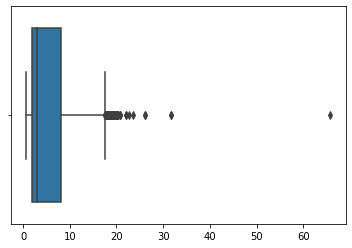

In [44]:
sns.boxplot(test_list)
plt.show()

와인들의 residual_sugar에서 이상치가 상당히 많이 검출되었음을 볼 수 있다.  
여기서 이상치란 1.5IQR + Q3 초과거나, Q1 - 1.5IQR 미만의 값들을 이상치로 취급한다. 

In [71]:
Q3 = np.quantile(test_list, 0.75)
Q1 = np.quantile(test_list, 0.25)
IQR = Q3 - Q1

In [74]:
under_cut = Q1 - 1.5 * IQR
over_cut = Q3 + 1.5 * IQR

In [75]:
IQR_over = []
for num in test_list:
    if num > over_cut or num < under_cut:
        IQR_over.append(num)

In [77]:
len(IQR_over)

118

### Z-score method

표준화 과정을 바탕으로 z-score가 3 이상이거나 -3 미만인 데이터를 이상치로 분류한다.

In [46]:
test_mean = np.mean(test_list)
test_std = np.std(test_list)

In [48]:
under_cut = test_mean - 3 * test_std
over_cut = test_mean + 3 * test_std

In [49]:
under_cut

-8.826751835155534

In [50]:
over_cut

19.715404645009272

In [51]:
z_score_over = []
for num in test_list:
    if num > over_cut or num < under_cut:
        z_score_over.append(num)

In [53]:
# 찾아낸 이상치 개수
len(z_score_over)

26

### Geometry-mean method

기하평균을 활용하여 이상치를 찾아내는 방법 또한 존재한다.  
기하평균 - 2.5 * std,  기하평균 + 2.5 * std를 범위로 활용한다.

In [61]:
import statistics as stat
test_geomean = stat.geometric_mean(test_list)
over_cut = test_geomean + 2.5 * test_std
under_cut = test_geomean - 2.5 * test_std

In [62]:
geomean_over = []
for num in test_list:
    if num > over_cut or num < under_cut:
        geomean_over.append(num)

In [64]:
len(geomean_over)

249